## Google的SpecAugument

In [1]:
import tensorflow as tf
import librosa
from specAugment import spec_augment_tensorflow
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
audio, sampling_rate = librosa.load(r'C:\Users\Administrator\Desktop\trail.wav')
mel_spectrogram = librosa.feature.melspectrogram(y=audio,
                                                     sr=sampling_rate,
                                                     n_mels=256,
                                                     hop_length=128,
                                                     fmax=8000)

In [3]:
mel_spectrogram.shape

(256, 570)

In [4]:
warped_masked_spectrogram = spec_augment_tensorflow.spec_augment(mel_spectrogram=mel_spectrogram)

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
warped_masked_spectrogram.shape

(256, 570)

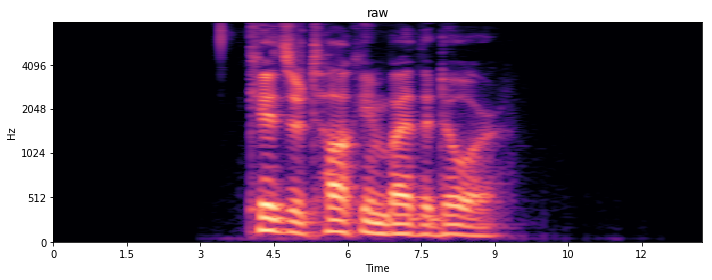

In [6]:
spec_augment_tensorflow.visualization_spectrogram(mel_spectrogram=mel_spectrogram,title="raw")

In [27]:
warped_masked_spectrogram = spec_augment_tensorflow.spec_augment(mel_spectrogram=mel_spectrogram)

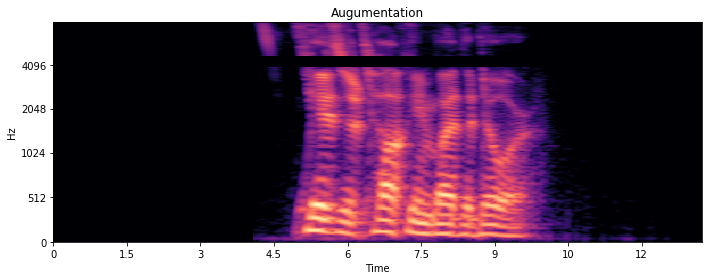

In [28]:
spec_augment_tensorflow.visualization_spectrogram(mel_spectrogram=warped_masked_spectrogram,title="Augumentation")

## 常规语音增强

In [2]:
import numpy as np
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from librosa.display import waveplot
y, sr= librosa.load(r'C:\Users\Administrator\Desktop\test.wav',sr=None)

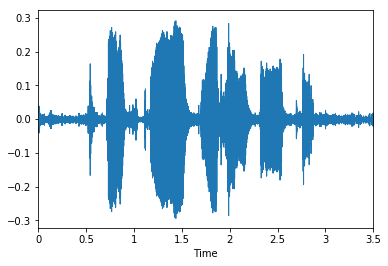

In [17]:
sound= y[:int(3.5*sr)]
waveplot(sound,sr)

In [18]:
ipd.Audio(sound, rate=sr)

### 加白噪声

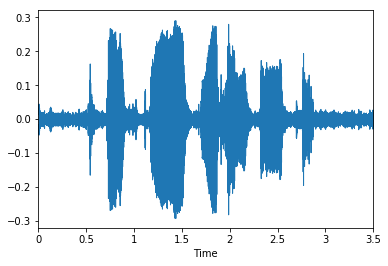

In [19]:
whitenoise= np.random.randn(len(sound))
sound_wn= sound+0.005*whitenoise
waveplot(sound_wn,sr)

In [20]:
ipd.Audio(sound_wn,rate=sr)

### 改变声音的位置

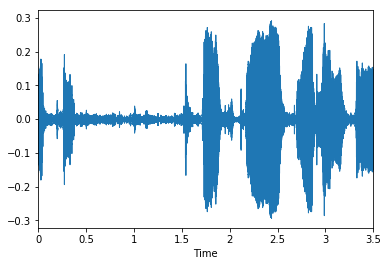

In [23]:
sound_roll= np.roll(sound, shift=sr)
waveplot(sound_roll,sr)
ipd.Audio(sound_roll,rate=sr)

### 改变声音快慢

In [34]:
def stretch(wave, rate=1):
    input_length= sr
    wave= librosa.effects.time_stretch(wave, rate)
    '''
    if len(wave)>input_length:
        wave= wave[:input_length]
    else:
        wave= np.pad(wave, (0,max(0,input_length-len(wave))),"constant")
    '''
    return wave

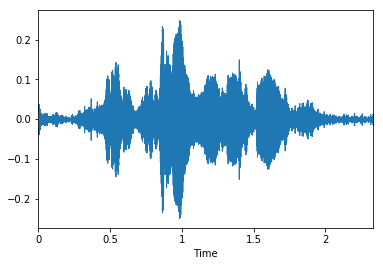

In [39]:
sound_stretch= stretch(sound, rate=1.5)
waveplot(sound_stretch, sr)
ipd.Audio(sound_stretch,rate=sr)